# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merged_df = pd.merge(study_results,mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
unique_mouse_IDs = len(mouse_merged_df['Mouse ID'].unique())
unique_mouse_IDs

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
mouse_duplicate = mouse_merged_df[mouse_merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
mouse_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseinfo_g989 = mouse_merged_df[mouse_merged_df['Mouse ID'] == 'g989']
mouseinfo_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mouse = 'g989'
mice_trimmed_df = mouse_merged_df[mouse_merged_df['Mouse ID'] != drop_mouse]
mice_trimmed_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
trimmed_mouse_IDs = len(mice_trimmed_df['Mouse ID'].unique())
trimmed_mouse_IDs

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# groupby(column)['Return data']
mice_group_tumor = mice_trimmed_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Individually: mean, median, variance, standard deviation, and SEM
mice_mean = mice_group_tumor.mean()
mice_med = mice_group_tumor.median()
mice_var = mice_group_tumor.var()
mice_std = mice_group_tumor.std()
mice_sem = mice_group_tumor.sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Need to put the above into a dictionary 
mice_drugr_df = pd.DataFrame({'Mean': mice_mean,
                              'Median': mice_med,
                              'Variance': mice_var,
                              'Standard Deviation': mice_std,
                              'SEM': mice_sem})

mice_drugr_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# mean, median, variance, standard deviation, and SEM
mice_agg = mice_trimmed_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var','std','sem'])
mice_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

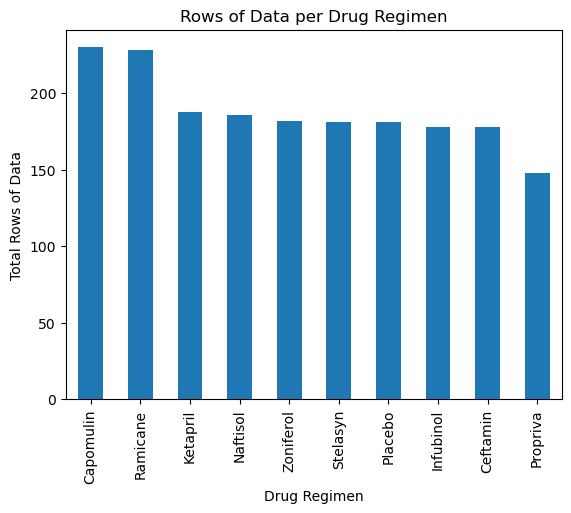

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
drug_count = mice_trimmed_df['Drug Regimen'].value_counts()
drug_count.plot(kind='bar', title='Rows of Data per Drug Regimen', xlabel='Drug Regimen',ylabel='Total Rows of Data')
plt.savefig("Images/Pandas_bar_drugregimen.png")
plt.show()

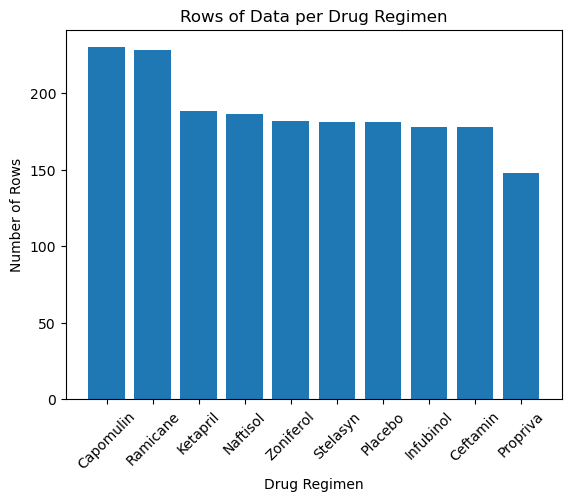

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count_2 = mice_trimmed_df['Drug Regimen'].value_counts()
plt.bar(drug_count.index, drug_count.values)
plt.title("Rows of Data per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)
plt.savefig("Images/pyplot_drugregimen.png")
plt.show()

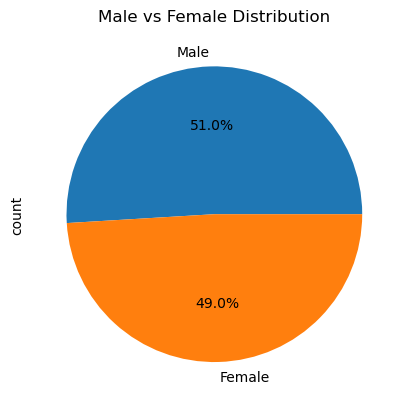

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# print(sexes) shows male as dominate, .value_counts() should show series with highest to lowest count
# so ordering males first
sexes = mice_trimmed_df['Sex'].value_counts()
sexes.plot(kind='pie',autopct="%1.1f%%",title='Male vs Female Distribution')
plt.savefig("Images/pandas_pie_drugregimen.png")
plt.show()

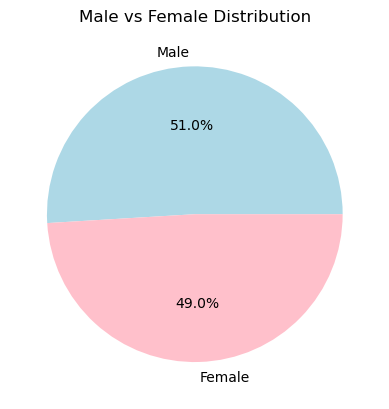

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
colors = ["lightblue","pink"]
sexes = mice_trimmed_df['Sex'].value_counts()
plt.pie(sexes, labels = labels, colors=colors,autopct="%1.1f%%")
plt.title('Male vs Female Distribution')
plt.savefig("Images/pypie_drugregimen.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html,ChatGPT
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = mice_trimmed_df['Drug Regimen'].isin(treat_list)
mice_drugfilter_df = pd.DataFrame(mice_trimmed_df[mask])

# Start by getting the last (greatest) timepoint for each mouse
mice_time_df = mice_drugfilter_df.sort_values(by="Timepoint")
mice_time_df = pd.DataFrame(mice_time_df.groupby('Mouse ID')['Timepoint'].max()).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_max_vol = pd.merge(mice_time_df,mice_drugfilter_df, on=['Mouse ID','Timepoint'])
mice_max_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list2 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
tumor_data = mice_max_vol['Tumor Volume (mm3)']
tumor_volumes = [tumor_vol for tumor_vol in tumor_data]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# 05-Data-Visualization, Day 3, Activity 02-Ins_Quartiles_and_outliers
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treat_list2:
    treatment_data = mice_max_vol.loc[mice_max_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    quartiles = tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {treatment} tumor volumes is: {lowerq}")
    print(f"The upper quartile of {treatment} tumor volumes is: {upperq}")
    print(f"The interquartile range of {treatment} tumor volumes is: {iqr}")
    print(f"The the median of {treatment} tumor volumes is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)] 
    if outliers.empty:
        print("No potential outliers")
    else:
        print(f'Potential outliers for {treatment}: {outliers}')
    print('-------------------------------------------------------------------')

The lower quartile of Capomulin tumor volumes is: 37.1877438025
The upper quartile of Capomulin tumor volumes is: 59.930261755
The interquartile range of Capomulin tumor volumes is: 22.742517952499995
The the median of Capomulin tumor volumes is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.
No potential outliers
-------------------------------------------------------------------
The lower quartile of Ramicane tumor volumes is: 37.1877438025
The upper quartile of Ramicane tumor volumes is: 59.930261755
The interquartile range of Ramicane tumor volumes is: 22.742517952499995
The the median of Ramicane tumor volumes is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.
No potential outliers
-------------------------------------------------------------------
The lower quartile of Infubinol tumor volumes is: 37.1877438025
The upper quartile of Infubinol tumor volumes is: 59

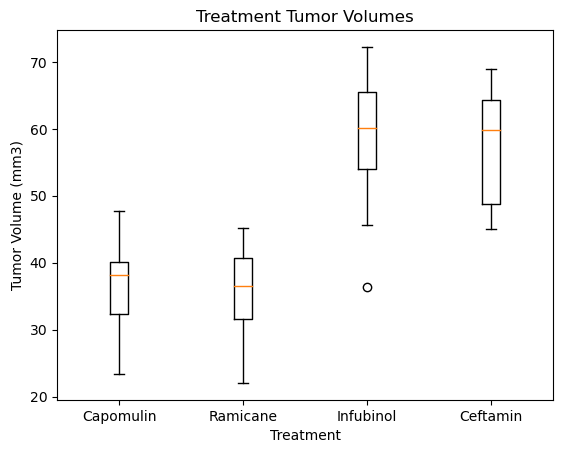

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# https://docs.python.org/3/library/functions.html#enumerate
# define the figure and short for subplot
fig1, ax = plt.subplots()
for i, treatment in enumerate(treat_list2, start=1):
    treatment_data = mice_max_vol.loc[mice_max_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    #boxplot for each treatment but in the same figure
    ax.boxplot(treatment_data, positions=[i], labels=[treatment])


ax.set_title('Treatment Tumor Volumes')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')

ax.set_xticks(range(1, len(treat_list2) + 1))
ax.set_xticklabels(treat_list2)
plt.show()
# That is only 1 boxplot - it's not separated per treatment

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
